# Case Study on ANOVA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**XYZ Company has offices in four different zones. The company wishes to
investigate the following :**


**● The mean sales generated by each zone.**

**● Total sales generated by all the zones for each month.**

**● Check whether all the zones generate the same amount of sales.**

In [2]:
sales_data=pd.read_csv('Sales_data_zone_wise.csv')
sales_data.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [5]:
sales_data.shape

(29, 5)

In [8]:
summary=sales_data.describe()
summary

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [9]:
summary.loc['mean']

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
Name: mean, dtype: float64

**Out of the 4 zones, the mean sales generated by zone D is highest & the mean sales generated by zone A is the least one.The mean sales value of zone B & zone C differ by a small amount.**

In [27]:
salesbymonth=sales_data.sum(axis=1)
salesbymonth

0     7022544
1     7152303
2     6475939
3     8174449
4     5995328
5     7151387
6     7287108
7     7816299
8     6703395
9     7128210
10    7032783
11    6111084
12    5925424
13    7155515
14    5934156
15    6506659
16    7149383
17    7083490
18    6971953
19    7124599
20    7389597
21    7560001
22    6687919
23    7784747
24    6095918
25    6512360
26    6267918
27    7470920
28    6772277
dtype: int64

**Total sales generated by all the zones for each month is given above as "salesbymonth".**

In [28]:
salesbymonth.max()

8174449

In [29]:
salesbymonth.min()

5925424

**We can see that the highest value of sales is in 3rd month and the lowest value is in 12th month.**

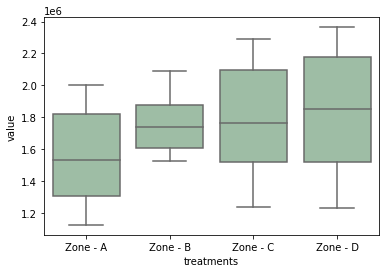

In [30]:
sales_data_melt = pd.melt(sales_data.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
sales_data_melt.columns = ['index', 'treatments', 'value']
ax = sns.boxplot(x='treatments', y='value', data=sales_data_melt, color='#99c2a2')
plt.show()

**Null hypothesis,H0 : All the zones generate equal amount of sales.**

**Alternative hypothesis,H1 : The sales generated by different zones are different.** 

**Significance level=0.05.**

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=sales_data_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


**The p value is 0.001183.**

**The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we reject the null hypothesis and conclude that there are significant differences in sales among different zones.**